# Download the data

In [37]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets","housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [38]:
fetch_housing_data()

In [39]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [40]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [41]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [42]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [43]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
# housing.hist(bins=50, figsize=(20,15))
# plt.show()

# Create a test set

In [45]:
import numpy as np

def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [46]:
train_set, test_set = split_train_test(housing,0.2)
print(len(train_set))
print(len(test_set))

16512
4128


In [47]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [48]:
housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [49]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [50]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20


## Using SKLEARN method with randomseed=42

In [51]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state=42)

## Using SKLEARN method with stratified shuffle

In [52]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6, np.inf],
                               labels=[1,2,3,4,5])
                               
# housing["income_cat"].hist()

In [53]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [54]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [55]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [56]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [57]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


# Visualise the data

In [58]:
# Create a copy
housing = strat_train_set.copy()

In [59]:
# housing.plot(kind="scatter", x="longitude", y="latitude")

In [60]:
# housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

In [61]:
# housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            #  s=housing["population"]/100, label="population", figsize=(10,7),
            #  c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
# plt.legend()

# Looking for correlations

In [62]:
corr_matrix = housing.corr()

In [63]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [64]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]

# scatter_matrix(housing[attributes], figsize=(12,8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

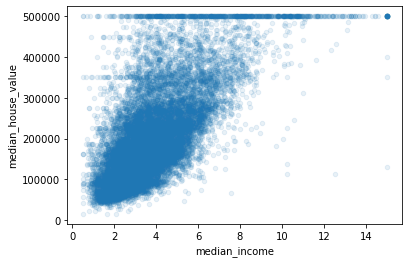

In [65]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1)

In [66]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [67]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [68]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

# Data cleaning

Book is about to show me how to us sklearn's imputer for the NaN filling with the median value.  However first there are 3 manual methods shown below.

These lines do nothing, they need to be assigned to `housing = ___`

In [69]:
# Option 1 remove rows containing na in total_bedrooms
housing.dropna(subset=["total_bedrooms"])
# Option 2 remove entire total_bedrooms column from df
housing.drop("total_bedrooms", axis=1)
# Option 3 set na entries to some value (zero, mean, median...)
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

## Now try sklearn method

In [70]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

# Doesn't work with text data, so drop the ocean_proximity column
housing_num = housing.drop("ocean_proximity", axis=1)

# Fit the imputer to the training data
imputer.fit(housing_num);

In [71]:
# Imputer only calculated the median of each column so far
print(imputer.statistics_)

# is the same as 
print(housing_num.median().values)

[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]
[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]


In [72]:
# Use the imputer to transform the training set
X = imputer.transform(housing_num)

# Store the X np.array as a DataFrame
housing_tr = pd.DataFrame(X,columns=housing_num.columns, 
                          index=housing_num.index)

## Setting up the text/categorical attributes

In [76]:
housing_cat = housing[["ocean_proximity"]] # not sure why double bracket
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [78]:
# Convert text categories to numbers
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10] # Print first 10 values?

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [79]:
# Can access category names like this
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## One hot encoding
usually numerical values in proximity mean something similar (eg. bad, average, good) but in this case the categories are in no particular order.

One hot encoding is when we create one binary attribute per category.  So "<1H OCEAN"  gets one 1 or 0 stored as it's own attribute/column, and so do the other text category values.  sklearn helps do this conveniently.

**Note:** if large number of categories, one hot encoding can slow down training and degrade performance, may be better to replace with related numerical features instead.  Ocean proximity could become "distance to ocean", or a country code could be replaced with population size etc.

In [80]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot # Outputs a sparse matrix instead of NumPy array

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Storing as a sparse matrix is more memory efficient if we have categorical attributes with many categories.  Only the location of the non-zero values are stored in memory.

In [81]:
# Could convert to Numpy if wanted
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [82]:
# Again can get category names using
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## **Extra bit**
Can create custom transformers. Book makes one below which basically generates the "combined categories" like we did earlier.  I've not read into this bit yet, will refer to in future

Building it this way allows to easily automate investigating these parameters, and whether thy actually improve the ML model or not.  It's settable easily using a hyperparameter

In [84]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # get the column indices

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [85]:
# Outputs as Numpy array, so to recover back to a DataFrame
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
18632,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
14650,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


## Building a transformation pipeline
Allows to combine multiple steps into one convenient process.

Takes a list of name/estimator pairs defining a sequence of steps. All but the last estimator must be *transformers* (i.e must have a `fit_transform()` method.

Here we've included a `StandardScaler()` estimator, which does feature scaling using the *standardisation* method rather than *Min-max scaling*
- **Min-max scaling**: subtract min value and divide by `(max-min)`. Results in range between 0 and 1.
- **Standardisation**: subtract the mean, then divide by stddev.  *This method is less sensitive to outliers*

In [86]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

We can use new feature in Scikit-learn to do transformation also on categorical attributes together into one DataFrame.  First get list of numerical columns, then categorical ones

In [88]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

# Select and train a model

## Linear Regression model
First try a linear regression model

In [94]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels);

In [106]:
# Now predict some values (first 5 of training set) to see how well the linear regression works
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions: ",lin_reg.predict(some_data_prepared))
print("Labels:      ", list(some_labels))

Predictions:  [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels:       [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


Predictions don't look all that accurate. let's repeat on the whole training set and compute the RMSE

In [121]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848922

This wasn't very accurate.  Let's try a decision tree instead

## Decision Tree Regressor Model

In [122]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels);

In [123]:
# Let's evaluate the decision tree
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

This looks too good to be true. We've probably overfit the data badly.  Should look ad doing a cross validation within the training set, since we don't want to touch the test set until we are ready to launch a model we are confident about.

### Cross validation
Scikit-learn splits the training data into 10 "folds" and trains the model 10 times, picking a different fold for evaluation each time, and training on the other 9 folds.

In [130]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores) # cross_val_score generates a score as a utility, not cost function

In [131]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [70018.35434077 67694.65754024 72193.40133896 68259.54598419
 69482.03378006 74130.74183712 71326.50734525 70654.48943505
 77784.69865238 69341.00708032]
Mean: 71088.5437334328
Standard deviation: 2861.1353659266456


Repeat the same process for the linear regression model for comparison again

In [132]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798347


## Random Forest Regressor Model
Random forest works by training many decision trees on random subsets of the features, then averaging out their predictions.  This is an ensemble method.

In [135]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

array([49876.73446516, 47357.42028804, 50270.82604203, 52344.61142458,
       49634.08093449, 53374.32958879, 48640.80201211, 47755.84050155,
       53112.34015084, 50095.95592337])

In [136]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                               scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [49205.14028671 47685.99608957 49814.75386181 52138.00352666
 49078.35993267 53584.78940578 48549.50720877 47797.04201373
 52750.42170996 50307.6399302 ]
Mean: 50091.16539658637
Standard deviation: 1970.411901383064


Learn how to save the model and reload to avoid having to repeat all the CPU heavy jobs before

In [139]:
import joblib

joblib.dump(lin_reg,"lin_reg.pkl");
joblib.dump(tree_reg,"tree_reg.pkl");
joblib.dump(forest_reg,"forest_reg.pkl");

In [ ]:
# lin_reg = joblib.load("lin_reg.pkl")
# tree_reg = joblib.load("tree_reg.pkl")
# forest_reg = joblib.load("forest_reg.pkl")

# Tuning the model

## Grid Search tuning
For example, try running a grid search to find the best hyperparameters for the forest regression


In [140]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap':[False], 'n_estimators':[3,10],'max_features':[2,3,4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [141]:
# Get the best hyperparameters combo with the following
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [142]:
# Or get the best estimator directly by
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [143]:
# Evaluation scores for the grid_search
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64542.29572280943 {'max_features': 2, 'n_estimators': 3}
55440.57515083823 {'max_features': 2, 'n_estimators': 10}
53199.63055492238 {'max_features': 2, 'n_estimators': 30}
60565.189443606374 {'max_features': 4, 'n_estimators': 3}
52815.78250259756 {'max_features': 4, 'n_estimators': 10}
50712.61115680234 {'max_features': 4, 'n_estimators': 30}
59162.605894788416 {'max_features': 6, 'n_estimators': 3}
52564.09656729821 {'max_features': 6, 'n_estimators': 10}
49890.443266900766 {'max_features': 6, 'n_estimators': 30}
59439.69503296891 {'max_features': 8, 'n_estimators': 3}
52240.32464450367 {'max_features': 8, 'n_estimators': 10}
49855.574054302306 {'max_features': 8, 'n_estimators': 30}
62378.798483819206 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54483.04146981014 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60496.23392118367 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52597.473339881115 {'bootstrap': False, 'max_features': 3, 'n_estimator

Looks like the random forest model with `max_features=8` and `n_estimators=30` was best.<br>
Slightly better than we achieved previously.

We can inspect the feature importances within the best grid_search model

In [145]:
feature_importances = grid_search.best_estimator_.feature_importances_

extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances,attributes), reverse=True)


[(0.36582995320925393, 'median_income'),
 (0.1673774680923627, 'INLAND'),
 (0.10564197365185363, 'pop_per_hhold'),
 (0.07555292352188274, 'longitude'),
 (0.06584148203287604, 'latitude'),
 (0.056339131234632175, 'rooms_per_hhold'),
 (0.04416524086142354, 'bedrooms_per_room'),
 (0.042905870820659754, 'housing_median_age'),
 (0.016224032953977233, 'total_rooms'),
 (0.015693783399833544, 'population'),
 (0.014835042350198042, 'total_bedrooms'),
 (0.014664852914769948, 'households'),
 (0.007220413280222486, '<1H OCEAN'),
 (0.003928630982463028, 'NEAR BAY'),
 (0.003614779062516969, 'NEAR OCEAN'),
 (0.00016442163107418208, 'ISLAND')]

It looks like only one of our ocean_proximity categories is actually useful (INLAND). We could try dropping the other ones.

# Evaluate the system using the test set

In [150]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

47107.53462771337


Can compute a 95% confidence interval for this using scipy

In [152]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                           loc = squared_errors.mean(),
                           scale=stats.sem(squared_errors)))

array([45150.29997127, 48986.63133863])

# CH2 Exercises
Try a support vector machine regressor

In [156]:
from sklearn.svm import SVR

sv_reg = SVR(kernel="linear", C=1)
sv_reg.fit(housing_prepared, housing_labels)


SVR(C=1, kernel='linear')

In [157]:
sv_scores = cross_val_score(sv_reg, housing_prepared, housing_labels,
                               scoring="neg_mean_squared_error", cv=10)
sv_rmse_scores = np.sqrt(-sv_scores)
display_scores(sv_rmse_scores)

Scores: [105342.09141998 112489.24624123 110092.35042753 113403.22892482
 110638.90119657 115675.8320024  110703.56887243 114476.89008206
 113756.17971227 111520.1120808 ]
Mean: 111809.84009600841
Standard deviation: 2762.393664321567


In [158]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'C':[3,10,30]},
    {'bootstrap':[False], 'C':[3,10]},
]

sv_reg = SVR(kernel="linear")

grid_search = GridSearchCV(sv_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

ValueError: Invalid parameter bootstrap for estimator SVR(C=3, kernel='linear'). Check the list of available parameters with `estimator.get_params().keys()`.